# S3 Compatible Storage
Let's use EOReader with products stored in a S3 compatible storage cloud.

This tutorial is a bit tricky as EOReader uses `rasterio` and `cloudpathlib` libraries and they are currently handling S3 credentials differently.
That's why we'll use the helper context manager `temp_s3` from `sertit.s3`, that will do the right connections for us.

<div class="alert alert-warning">
  
<strong>Warning:</strong> This tutorial assumes that you have correctly set <code>AWS_ACCESS_KEY_ID</code> and <code>AWS_SECRET_ACCESS_KEY</code> as environment variables
    
</div>

In [1]:
# Imports
import os
from cloudpathlib import AnyPath
import matplotlib.pyplot as plt

from sertit import s3

from eoreader.reader import Reader
from eoreader.bands import MNDWI, CLOUDS

# This endpoint points to your S3 compatible bucket
custom_s3_compatible_endpoint = os.getenv("AWS_S3_ENDPOINT")

# Be sure to have AWS_ACCESS_KEY_ID and AWS_SECRET_ACCESS_KEY environment variables correctly pointing to the credentials of your S3-compatible storage

In [2]:
with s3.temp_s3(default_endpoint=custom_s3_compatible_endpoint):
    path = AnyPath("s3://sertit-ci") / "eoreader" / "optical" / "S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE"
    
    # Create the reader
    reader = Reader()

    # Open your product
    prod = reader.open(path, remove_tmp=True)

    # Load this band
    band_ds = prod.load([MNDWI, CLOUDS])

/opt/conda/lib/python3.11/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(


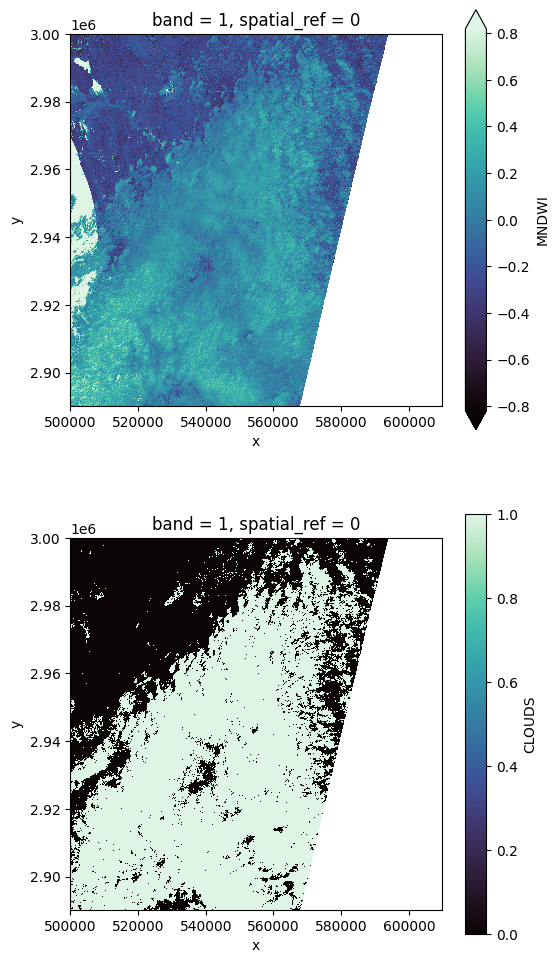

In [3]:
# Display
nrows = len(band_ds)
fig, axes = plt.subplots(nrows=nrows, figsize=(3 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})  # Square plots
for i, band in enumerate(band_ds.values()):
    band[::10, ::10].plot(x="x", y="y", ax=axes[i], robust=True, cmap="mako")